In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# READ_Data

In [2]:
file_path1 = '/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz'

# Read the compressed CSV file into a pandas DataFrame
df = pd.read_csv(file_path1, compression='gzip')

# Now you can work with the DataFrame as needed
df.head(5)# Display the first few rows of the DataFrame


/tmp/ipykernel_33/3502482444.py:4: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path1, compression='gzip')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


# Cleaning

In [4]:
# Chọn các cột biến
cols = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 
        'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
        'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate',
        'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec',
        'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade',
        'term', 'title', 'total_acc', 'verification_status', 'zip_code']

# Lọc dữ liệu
data = df[cols]
data.shape

(2260701, 31)

* Chọn những biến liên quan tới khách hàng và các khoản vay

In [5]:
data.sample(5)

,addr_state,annual_inc,application_type,dti,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,zip_code
730954,NJ,122605.0,Individual,15.88,Nov-1978,3 years,Remote Pilot Computer Operator,674.0,670.0,C,...,0.0,other,12983.0,94.8,C2,36 months,Other,39.0,Source Verified,077xx
2368,IN,45000.0,Individual,26.76,May-1997,10+ years,EMR Content Specialist,674.0,670.0,C,...,0.0,debt_consolidation,17916.0,48.3,C5,60 months,NaN,28.0,Not Verified,471xx
1650006,CA,19200.0,Individual,9.63,Jul-1999,3 years,Social Security,709.0,705.0,B,...,0.0,debt_consolidation,6949.0,81.8,B5,36 months,Pay Dental Requirement,7.0,Not Verified,959xx
536682,TN,49000.0,Joint App,57.48,Oct-1996,< 1 year,Teacher,729.0,725.0,C,...,0.0,debt_consolidation,21490.0,59.0,C1,60 months,Debt consolidation,18.0,Not Verified,371xx
637843,CT,78975.0,Individual,9.24,Mar-2005,10+ years,General Manager,694.0,690.0,C,...,1.0,debt_consolidation,16353.0,58.0,C2,36 months,Debt consolidation,20.0,Source Verified,065xx


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 31 columns):
 #   Column                Dtype  
---  ------                -----  
 0   addr_state            object 
 1   annual_inc            float64
 2   application_type      object 
 3   dti                   float64
 4   earliest_cr_line      object 
 5   emp_length            object 
 6   emp_title             object 
 7   fico_range_high       float64
 8   fico_range_low        float64
 9   grade                 object 
 10  home_ownership        object 
 11  id                    object 
 12  initial_list_status   object 
 13  installment           float64
 14  int_rate              float64
 15  issue_d               object 
 16  loan_amnt             float64
 17  loan_status           object 
 18  mort_acc              float64
 19  open_acc              float64
 20  pub_rec               float64
 21  pub_rec_bankruptcies  float64
 22  purpose               object 
 23  revol_b

#### Kiểm tra các giá trị Null

In [7]:
# Tính giá trị null của từng cột
null_percentages = (data.isnull().sum())
print(null_percentages)

addr_state                  33
annual_inc                  37
application_type            33
dti                       1744
earliest_cr_line            62
emp_length              146940
emp_title               167002
fico_range_high             33
fico_range_low              33
grade                       33
home_ownership              33
id                           0
initial_list_status         33
installment                 33
int_rate                    33
issue_d                     33
loan_amnt                   33
loan_status                 33
mort_acc                 50063
open_acc                    62
pub_rec                     62
pub_rec_bankruptcies      1398
purpose                     33
revol_bal                   33
revol_util                1835
sub_grade                   33
term                        33
title                    23359
total_acc                   62
verification_status         33
zip_code                    34
dtype: int64


In [8]:
# Lấy ra các biến có trên 10000 giá trị NULL
high_null_cols = null_percentages[null_percentages > 10000].index
print(high_null_cols)

Index(['emp_length', 'emp_title', 'mort_acc', 'title'], dtype='object')


* Biến emp_title(Nghề nghiệp của người vay) có thể chuyển giá trị NULL thành "Out of job" 

In [9]:
data['emp_title'] = data['emp_title'].fillna('Out of job')
print(data['emp_title'].value_counts())

/tmp/ipykernel_33/2123733746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['emp_title'] = data['emp_title'].fillna('Out of job')


emp_title
Out of job                             167002
Teacher                                 38824
Manager                                 34298
Owner                                   21977
Registered Nurse                        15867
                                        ...  
Electronic System Engineer                  1
Substitute Teacher/Paraprofessional         1
eligiblity worker                           1
Escalated Customer Service Advisor          1
Current Operations Officer                  1
Name: count, Length: 512695, dtype: int64


* Lúc này các số liệu ở cột emp_length(số năm kinh nghiệm) thuộc về người thất nghiệp sẽ chuyển về "0 year" (0 năm exp)

In [10]:
# Cập nhật giá trị cột emp_length cho khách hàng "Out of job" thành "0 year"
data.loc[data['emp_title'] == 'Out of job', 'emp_length'] = '0 year'
# print(data['emp_length'].value_counts())
#kiểm tra giá trị Null của cột emp_length
data['emp_length'].isnull().sum()

798

* ta tiến hành thay giá trị NULL bằng '0 year'

In [11]:
data['emp_length'] = data['emp_length'].fillna('0 year')

/tmp/ipykernel_33/320381620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['emp_length'] = data['emp_length'].fillna('0 year')


* Biến mort_acc(số tài khoản thế chấp) giá trị NULL ta có thể cho mặc định là 0 có tài khoản thế chấp
* Biến title(tiêu đề khoản vay ) giá trị NULL thành 'Unknow'

In [12]:
data['mort_acc'] = data['mort_acc'].fillna(0)
data['title'] = data['title'].fillna('Unknow')

/tmp/ipykernel_33/3110881091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mort_acc'] = data['mort_acc'].fillna(0)
/tmp/ipykernel_33/3110881091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].fillna('Unknow')


* Kiểm tra dữ liệu biến loan_status: Trạng thái của khoản vay

In [13]:
data['loan_status'].value_counts(dropna=False)

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: count, dtype: int64

* Ta nên sử dung 4 giá trị :
** Fully Paid: Đây là trạng thái tốt, thể hiện người vay đã hoàn trả khoản vay đầy đủ.
** Current: Đây là trạng thái tốt, thể hiện người vay đang trong quá trình trả nợ đúng hạn.
** Charged Off: Đây là trạng thái xấu, thể hiện người vay không thể hoàn trả khoản vay và khoản vay đã bị ghi nợ.
** Late (31-120 days): Đây là trạng thái xấu, thể hiện người vay trễ hạn từ 31 đến 120 ngày.
* Cho mô hình vì ta chỉ cần biết người đó thuộc diện khách hàng tốt hay xấu

In [14]:
# Giữ lại các giá trị quan trọng cho biến loan_status
important_loan_status = ['Fully Paid', 'Current', 'Charged Off', 'Late (31-120 days)']
data = data[data['loan_status'].isin(important_loan_status)]
data.shape

(2245094, 31)

* tiếp tục cải thiện giá trị NULL

In [15]:
# Tính giá trị null của từng cột
null_percentages = (data.isnull().sum())
print(null_percentages)

addr_state                 0
annual_inc                 0
application_type           0
dti                     1697
earliest_cr_line           0
emp_length                 0
emp_title                  0
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
id                         0
initial_list_status        0
installment                0
int_rate                   0
issue_d                    0
loan_amnt                  0
loan_status                0
mort_acc                   0
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies     697
purpose                    0
revol_bal                  0
revol_util              1751
sub_grade                  0
term                       0
title                      0
total_acc                  0
verification_status        0
zip_code                   1
dtype: int64


* xóa đi những dòng chứa giá trị NULL còn lại

In [16]:
data = data.dropna()
data.shape

(2240952, 31)

* kiểm tra có bị trùng id khách hàng hay không

In [17]:
# Đếm số lượng ID khách hàng bị trùng lặp
duplicate_counts = data['id'].value_counts() - 1
duplicate_ids = duplicate_counts[duplicate_counts > 0]
print(duplicate_ids)

Series([], Name: count, dtype: int64)


#### Kiểm tra các giá trị ngoại lai

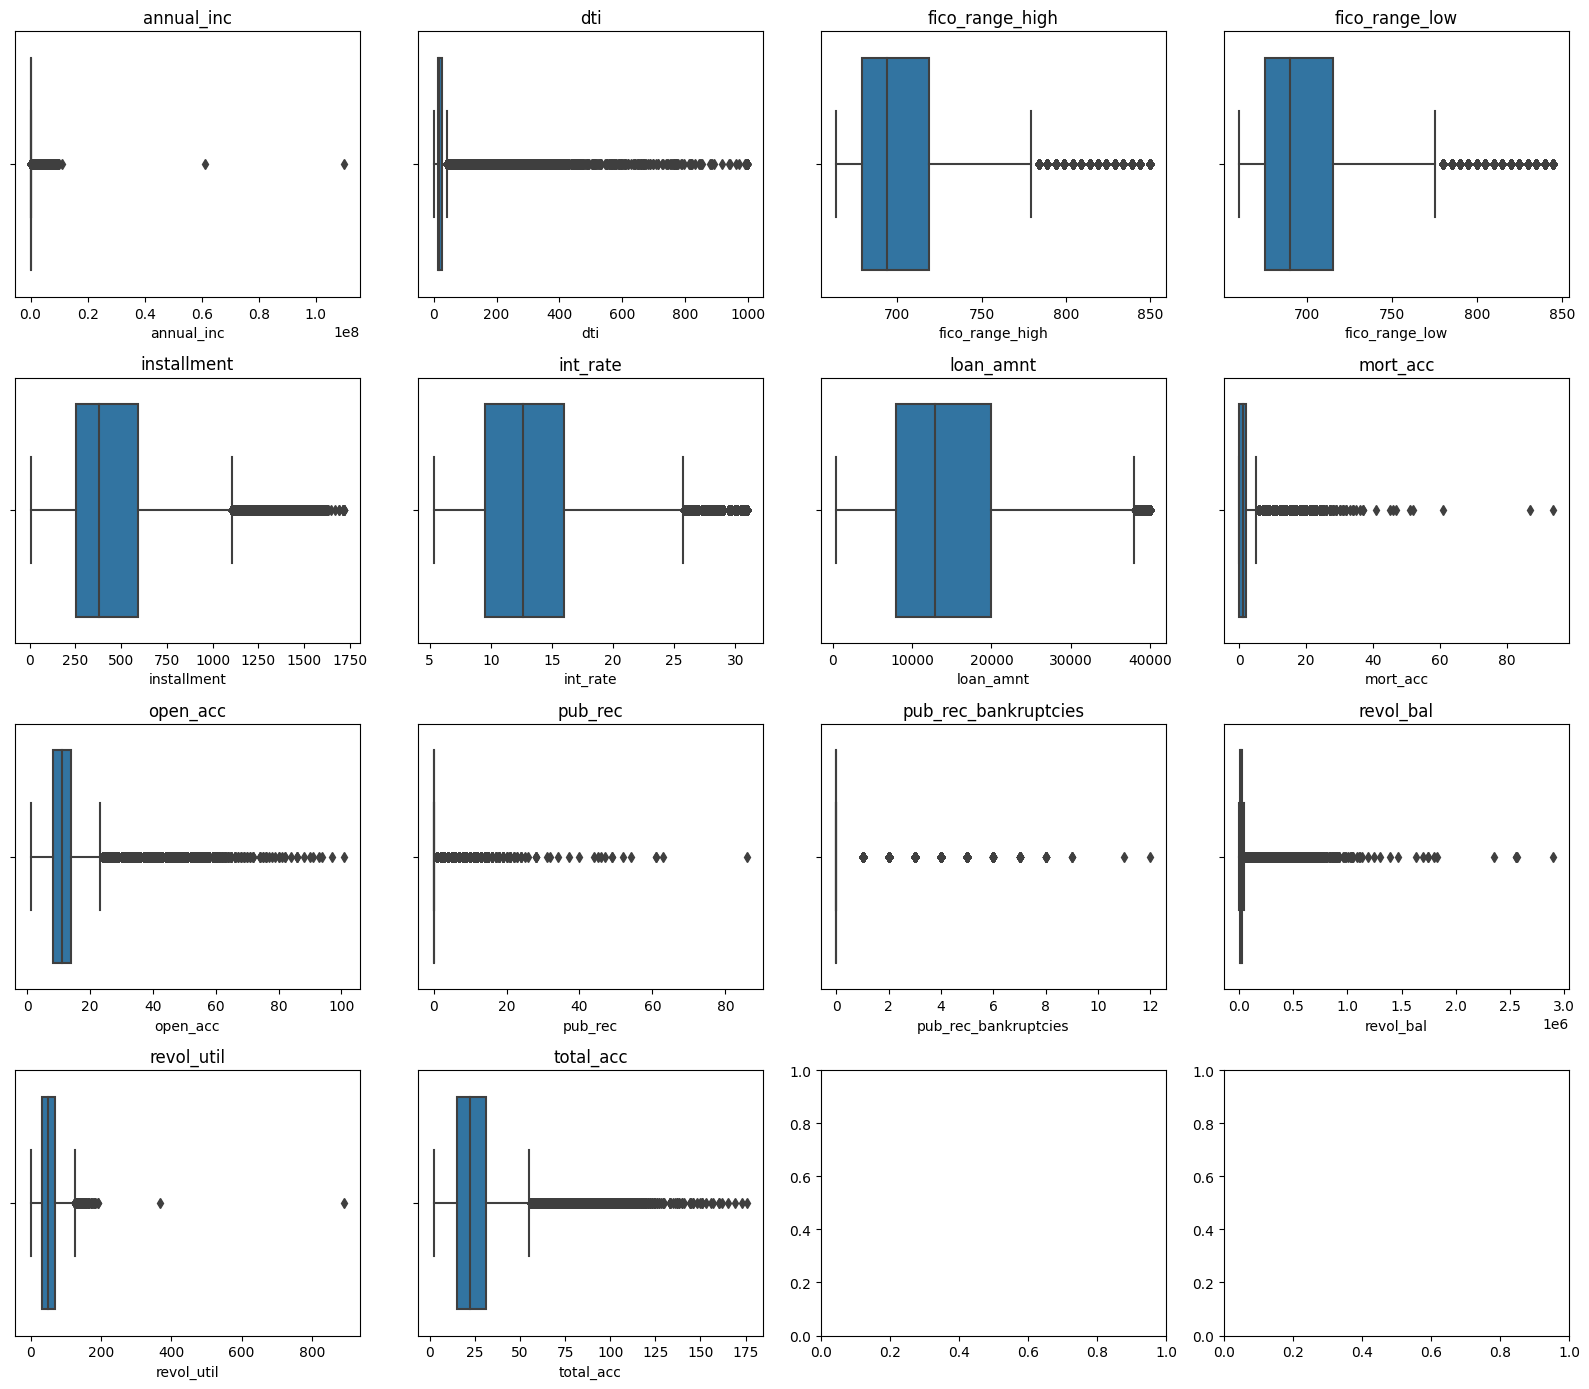

In [18]:
# Lấy các cột có kiểu dữ liệu float64
float_cols = [col for col in data.columns if data[col].dtype == 'float64']

# Vẽ biểu đồ hộp cho các cột float64
fig, axs = plt.subplots(figsize=(16, 1 * len(float_cols)), ncols=4, nrows=int(np.ceil(len(float_cols) / 4)))

for i, col in enumerate(float_cols):
    row = i // 4
    col_idx = i % 4
    sns.boxplot(x=col, data=data, ax=axs[row, col_idx])
    axs[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()

* Cột nào cũng xuất hiện giá trị ngoại lai

In [19]:
# Xử lý giá trị ngoại lai
for col in float_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Thay thế giá trị ngoại lai bằng ngưỡng tương ứng
    data.loc[data[col] < lower_bound, col] = lower_bound
    data.loc[data[col] > upper_bound, col] = upper_bound

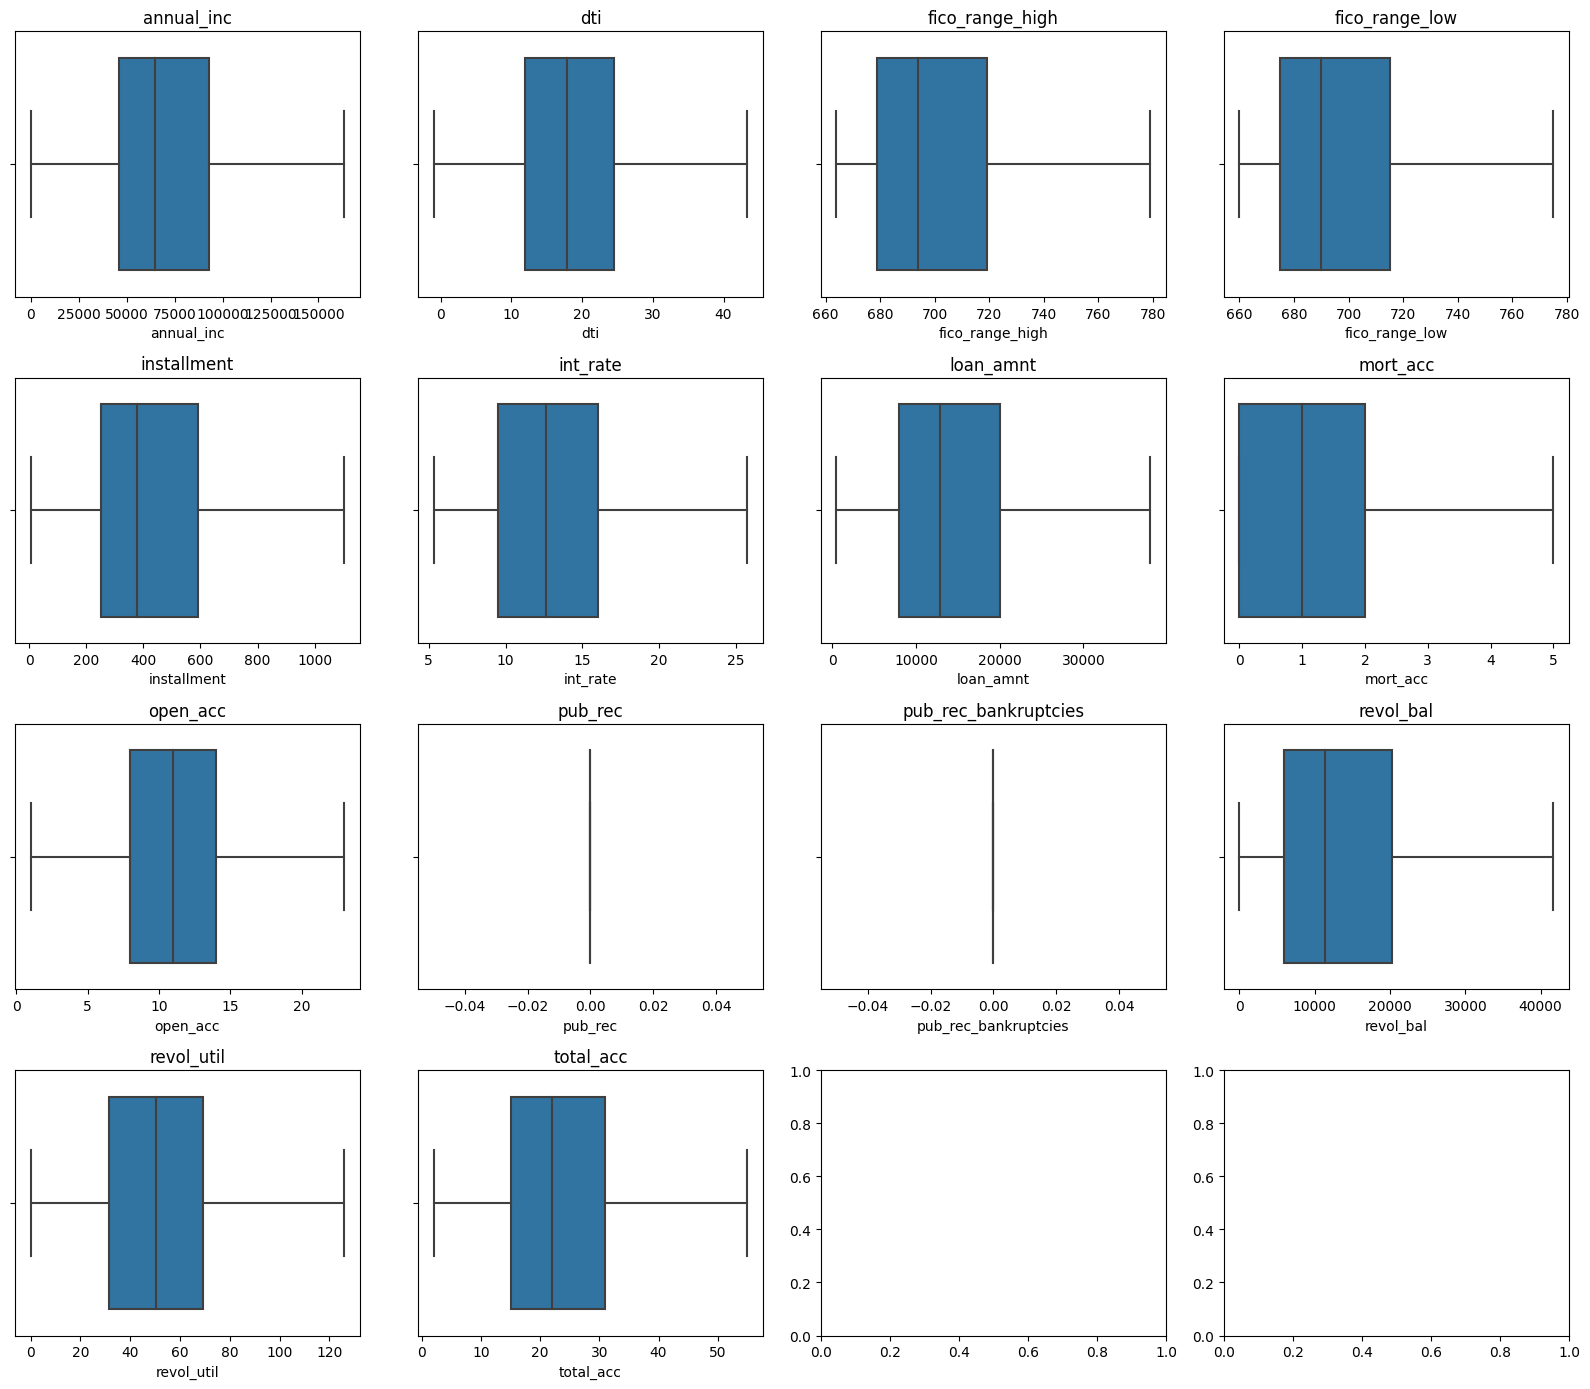

In [20]:
# Lấy các cột có kiểu dữ liệu float64
float_cols = [col for col in data.columns if data[col].dtype == 'float64']

# Vẽ biểu đồ hộp cho các cột float64
fig, axs = plt.subplots(figsize=(16, 1 * len(float_cols)), ncols=4, nrows=int(np.ceil(len(float_cols) / 4)))

for i, col in enumerate(float_cols):
    row = i // 4
    col_idx = i % 4
    sns.boxplot(x=col, data=data, ax=axs[row, col_idx])
    axs[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()

# Analyze_Data

#### Khoản vay và số lượng khoản vay

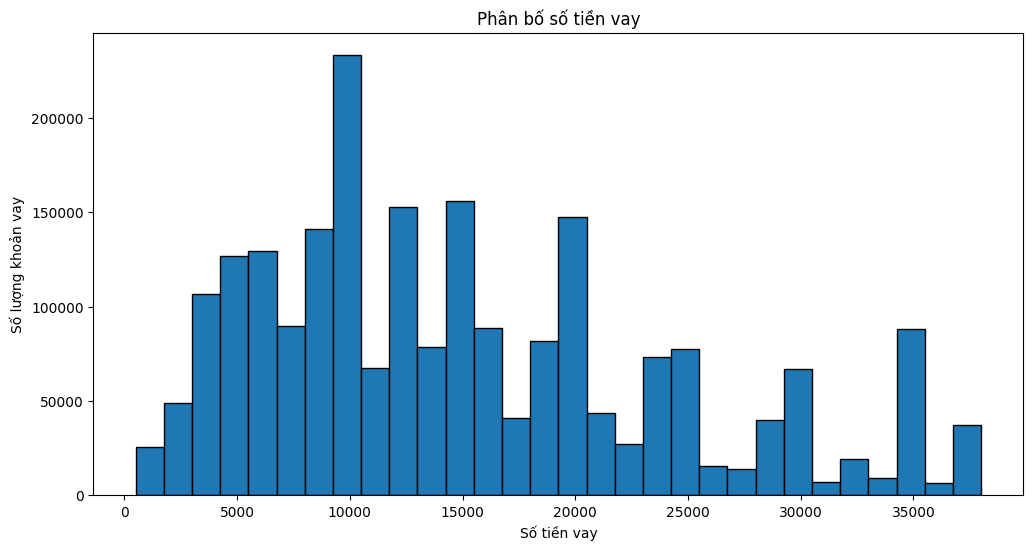

In [21]:
import matplotlib.pyplot as plt
loan_amounts = data['loan_amnt'] 
# Vẽ biểu đồ thể hiện số lượng từng khoản vay
plt.figure(figsize=(12, 6)) 
plt.hist(loan_amounts, bins=30, edgecolor='black') 
plt.title('Phân bố số tiền vay')
plt.xlabel('Số tiền vay')
plt.ylabel('Số lượng khoản vay')
plt.show()

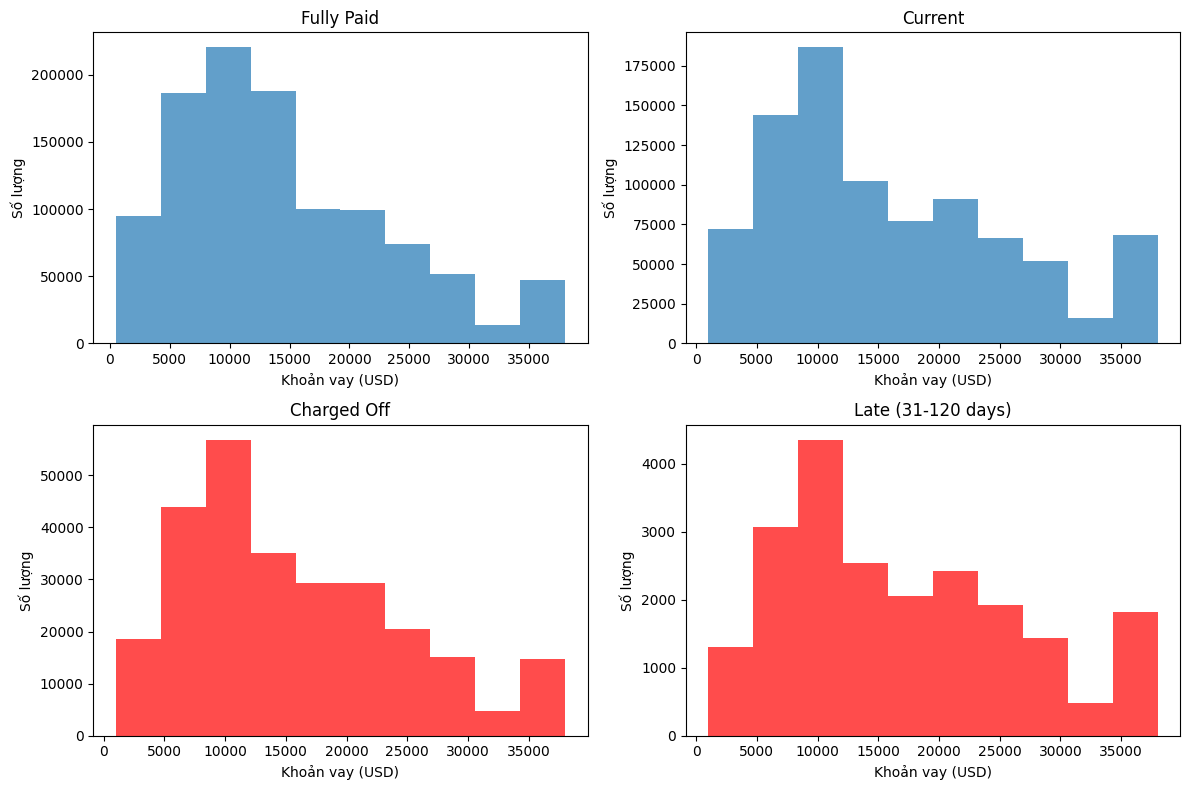

In [22]:
# Tạo các biểu đồ từng trạng thái vay
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Biểu đồ 1: Fully Paid
data[data['loan_status'] == 'Fully Paid']['loan_amnt'].plot(kind='hist', ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('Fully Paid')
axes[0,0].set_xlabel('Khoản vay (USD)')
axes[0,0].set_ylabel('Số lượng')

# Biểu đồ 2: Current
data[data['loan_status'] == 'Current']['loan_amnt'].plot(kind='hist', ax=axes[0,1], alpha=0.7)  
axes[0,1].set_title('Current')
axes[0,1].set_xlabel('Khoản vay (USD)')
axes[0,1].set_ylabel('Số lượng')

# Biểu đồ 3: Charged Off
data[data['loan_status'] == 'Charged Off']['loan_amnt'].plot(kind='hist', ax=axes[1,0], alpha=0.7, color="red")
axes[1,0].set_title('Charged Off')
axes[1,0].set_xlabel('Khoản vay (USD)')
axes[1,0].set_ylabel('Số lượng')

# Biểu đồ 4: Late (31-120 days)
data[data['loan_status'] == 'Late (31-120 days)']['loan_amnt'].plot(kind='hist', ax=axes[1,1], alpha=0.7, color="red")
axes[1,1].set_title('Late (31-120 days)')
axes[1,1].set_xlabel('Khoản vay (USD)')
axes[1,1].set_ylabel('Số lượng')

plt.tight_layout()
plt.show()

* Cho thấy khách hàng trả được nợ và đang trả nợ đúng hạn chiếm phần đa
* Thống kê:

In [23]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268190.0,15556.585630,8784.584422,1000.0,9000.0,14362.5,20400.0,38000.0
Current,876154.0,15879.827547,9624.796955,1000.0,8400.0,14000.0,21500.0,38000.0
Fully Paid,1075192.0,14127.532687,8638.535264,500.0,7500.0,12000.0,20000.0,38000.0
Late (31-120 days),21416.0,16893.591240,9544.035490,1000.0,10000.0,15000.0,24000.0,38000.0


#### Kiểu vay

In [24]:
#Tên khoản vay
data['title'].value_counts().head(10)

title
Debt consolidation         1144186
Credit card refinancing     466724
Home improvement            136223
Other                       126452
Major purchase               44442
Medical expenses             25151
Unknow                       23135
Business                     20581
Car financing                20380
Debt Consolidation           15663
Name: count, dtype: int64

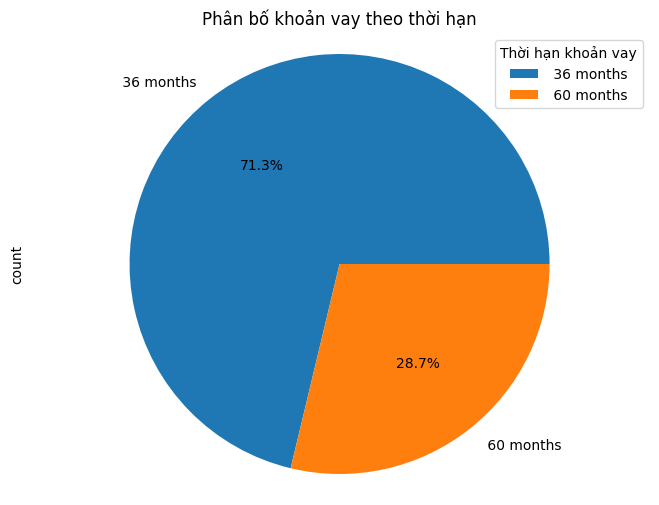

In [25]:
#phân tích biến term
# Tạo biểu đồ tròn
plt.figure(figsize=(8,6))
data['term'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Phân bố khoản vay theo thời hạn')
plt.axis('equal')
plt.legend(title='Thời hạn khoản vay')
plt.show()

* Khoản vay 3 năm chiếm 71.3% và 5 năm chiếm 28.7%

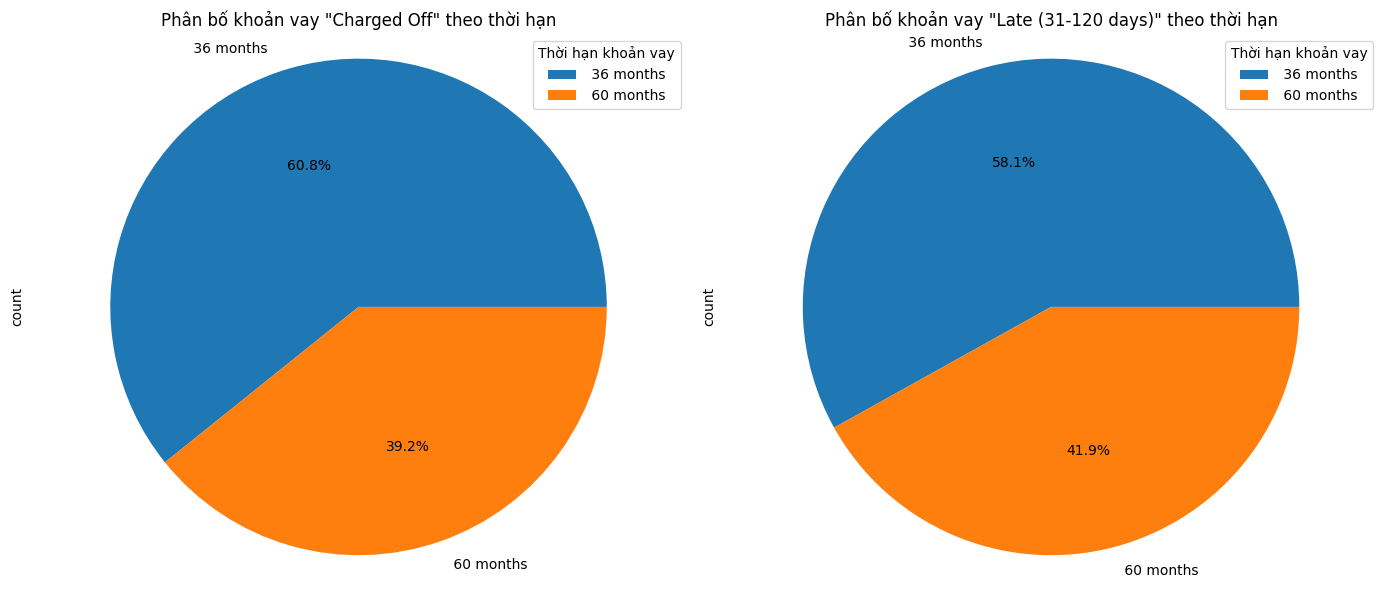

In [26]:
# Lọc dữ liệu chỉ với trạng thái "Charged Off" và "Late (31-120 days)"
charged_off = data[data['loan_status'] == 'Charged Off']
late = data[data['loan_status'] == 'Late (31-120 days)']

# Tạo biểu đồ tròn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ tròn cho "Charged Off"
charged_off['term'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Phân bố khoản vay "Charged Off" theo thời hạn')
ax1.axis('equal')
ax1.legend(title='Thời hạn khoản vay')

# Biểu đồ tròn cho "Late (31-120 days)"
late['term'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Phân bố khoản vay "Late (31-120 days)" theo thời hạn')
ax2.axis('equal')
ax2.legend(title='Thời hạn khoản vay')

plt.tight_layout()
plt.show()

* Các khoản vay có kỳ hạn 3 năm có khả năng không thu hồi cao hơn so với các khoản vay có kỳ hạn 5 năm.

In [27]:
#phân tích biến application_type
data['application_type'].value_counts(dropna=False)

application_type
Individual    2123788
Joint App      117164
Name: count, dtype: int64

* Hầu hết là loại vay cá nhân

In [28]:
# Phân tích biến in_rate
data['int_rate'].describe()

count    2.240952e+06
mean     1.303886e+01
std      4.711513e+00
min      5.310000e+00
25%      9.490000e+00
50%      1.262000e+01
75%      1.599000e+01
max      2.574000e+01
Name: int_rate, dtype: float64

* Lãi xuất từ ~5.3% đến ~40%

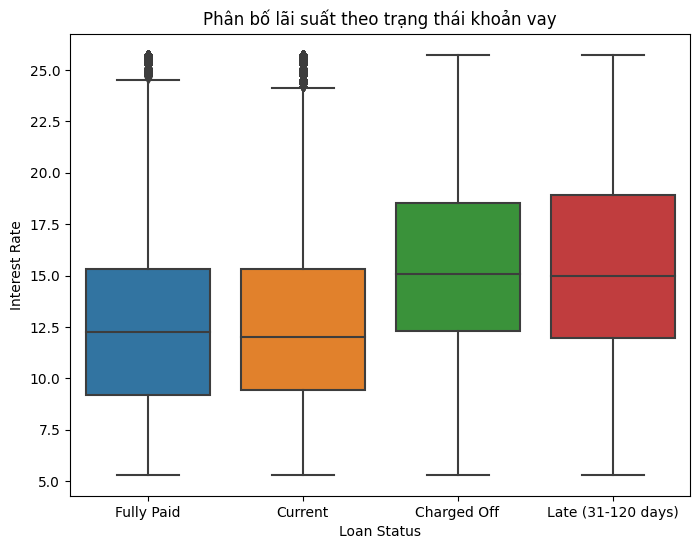

In [29]:
# Vẽ biểu đồ box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='int_rate', data=data)
plt.title("Phân bố lãi suất theo trạng thái khoản vay")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.show()

* Khách hàng có xu hướng không trả được nợ hoặc không đúng hạn khi lãi xuất cao

In [30]:
# Phân tích biến installment
data['installment'].describe()

count    2.240952e+06
mean     4.423228e+02
std      2.576563e+02
min      4.930000e+00
25%      2.516800e+02
50%      3.777100e+02
75%      5.927525e+02
max      1.104361e+03
Name: installment, dtype: float64

* Mức trả góp từ 493USD đến 17200 USD

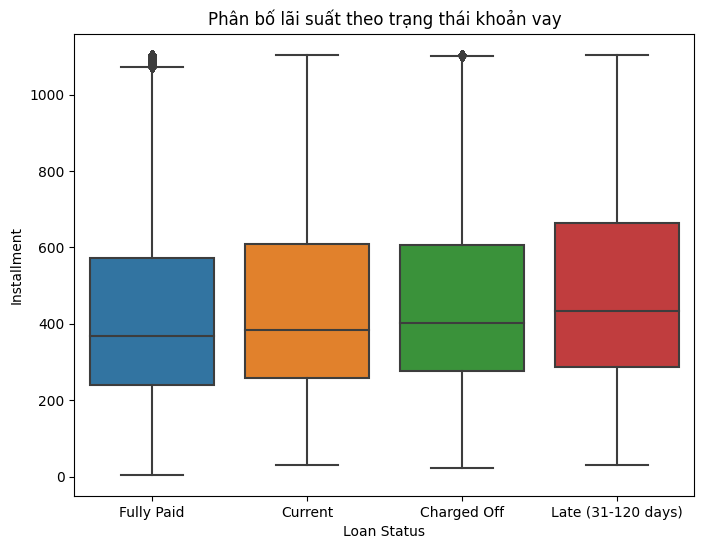

In [31]:
# Vẽ biểu đồ box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='installment', data=data)
plt.title("Phân bố lãi suất theo trạng thái khoản vay")
plt.xlabel("Loan Status")
plt.ylabel("Installment")
plt.show()

* Tương tự mức trả góp lớn cũng khiến việc trả nợ chậm trễ

#### Đối tượng cho vay

In [32]:
#Nghề nghiệp 
data['emp_title'].value_counts()

emp_title
Out of job                    163798
Teacher                        38563
Manager                        34039
Owner                          21729
Registered Nurse               15775
                               ...  
Director Production/Fleet          1
Diagnostics mach.                  1
Youth Security Counselor           1
TAX TECHNICIAN                     1
Current Operations Officer         1
Name: count, Length: 508614, dtype: int64

* chủ yến là thất nghiệp và giao viên 

In [33]:
print("Thống kê về biến emp_length:")
print(data['emp_length'].value_counts())

Thống kê về biến emp_length:
emp_length
10+ years    739286
2 years      201225
3 years      178454
< 1 year     176146
0 year       164589
1 year       146504
5 years      137631
4 years      134824
6 years      101292
7 years       91579
8 years       90820
9 years       78602
Name: count, dtype: int64


* chủ yếu khách hàng vay đều có hơn 10 năm kinh nghiệm với lĩnh vực của mình

In [34]:
data['emp_length'].replace('< 1 year', '0 year', inplace=True)

/tmp/ipykernel_33/1176745338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['emp_length'].replace('< 1 year', '0 year', inplace=True)


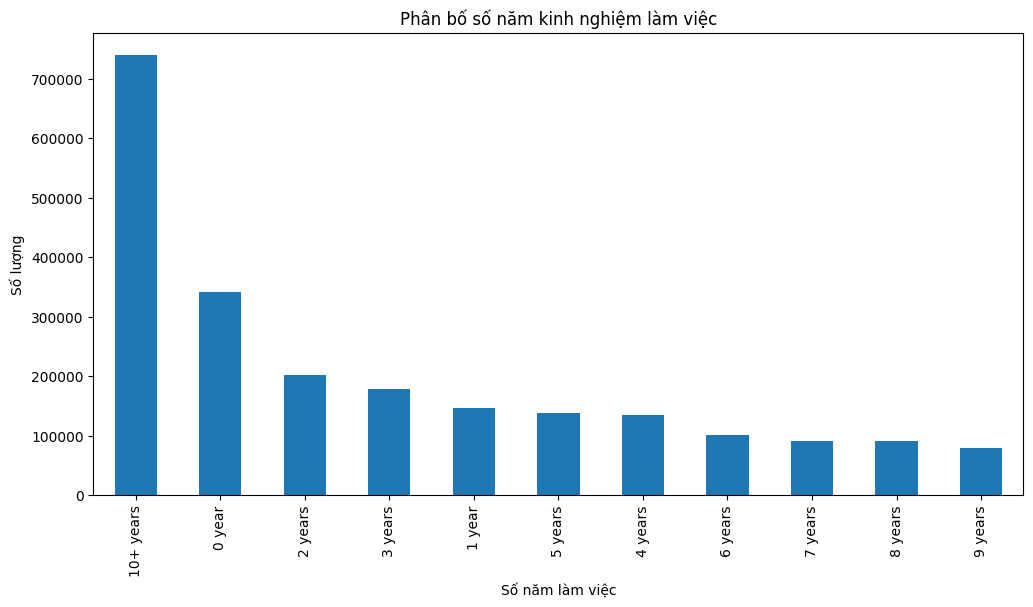

In [35]:
# Vẽ biểu đồ bar
plt.figure(figsize=(12, 6))
data['emp_length'].value_counts().plot(kind='bar')
plt.title("Phân bố số năm kinh nghiệm làm việc")
plt.xlabel("Số năm làm việc")
plt.ylabel("Số lượng")
plt.show()

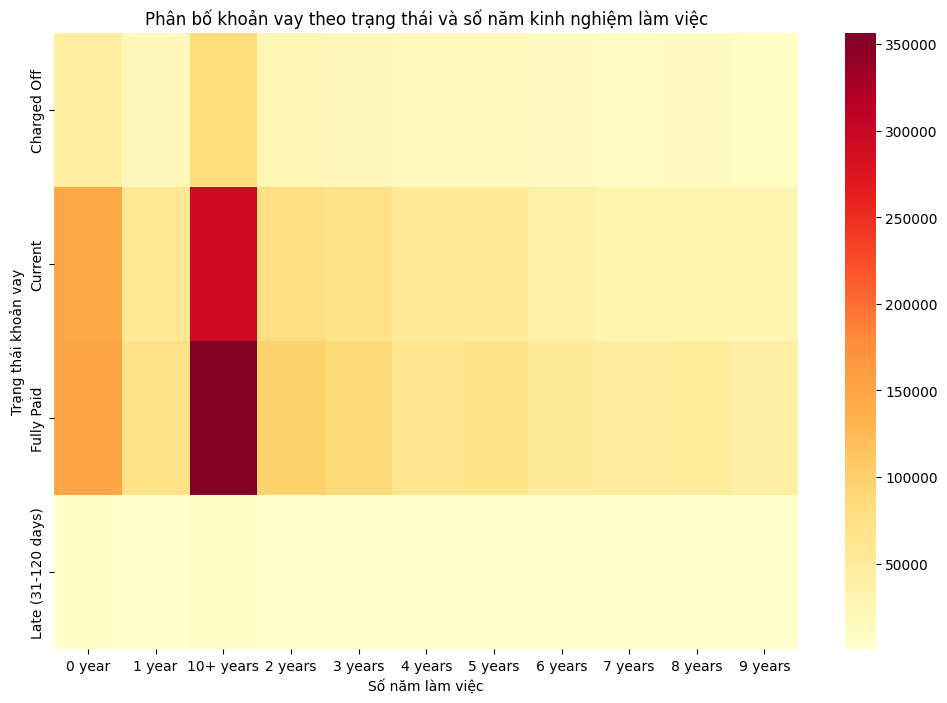

In [36]:
plt.figure(figsize=(12, 8))
pivot_table = data.pivot_table(index='loan_status', columns='emp_length', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title("Phân bố khoản vay theo trạng thái và số năm kinh nghiệm làm việc")
plt.xlabel("Số năm làm việc")
plt.ylabel("Trạng thái khoản vay")
plt.show()

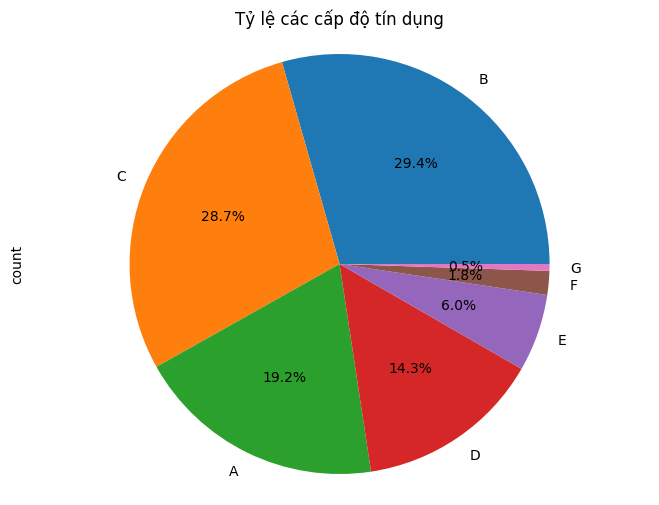

In [37]:
# Tín dụng
# Vẽ biểu đồ pie
plt.figure(figsize=(8, 6))
data['grade'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Tỷ lệ các cấp độ tín dụng")
plt.axis('equal')
plt.show()

* Người có tín dụng B vay nhiều nhất và G được cho vay ít nhất

<Figure size 1200x600 with 0 Axes>

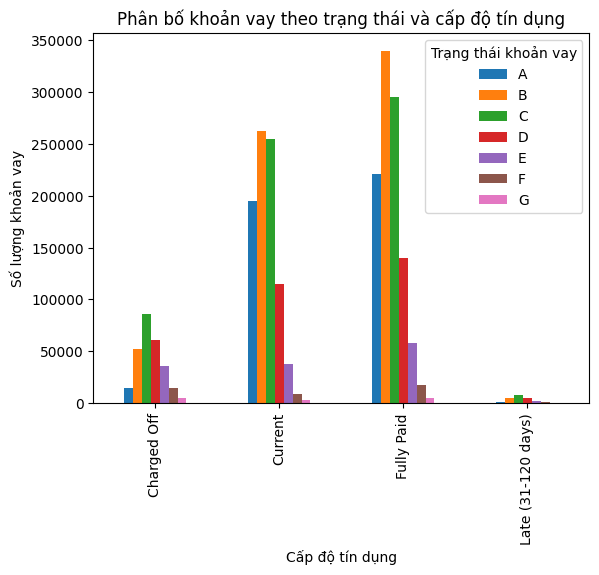

In [38]:
# Vẽ biểu đồ bar
plt.figure(figsize=(12, 6))
data.groupby(['loan_status', 'grade']).size().unstack().plot(kind='bar')
plt.title("Phân bố khoản vay theo trạng thái và cấp độ tín dụng")
plt.xlabel("Cấp độ tín dụng")
plt.ylabel("Số lượng khoản vay")
plt.legend(title='Trạng thái khoản vay')
plt.show()

In [39]:
# Thu nhập 
data.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268190.0,67874.362719,33965.303582,20.0,43000.0,60000.0,85000.0,163500.0
Current,876154.0,75543.839949,38175.090325,0.0,47000.0,67000.0,96000.0,163500.0
Fully Paid,1075192.0,73806.521666,36284.138266,16.0,47000.0,65000.0,93000.0,163500.0
Late (31-120 days),21416.0,72646.134337,36783.744112,32.0,45000.0,65000.0,91000.0,163500.0


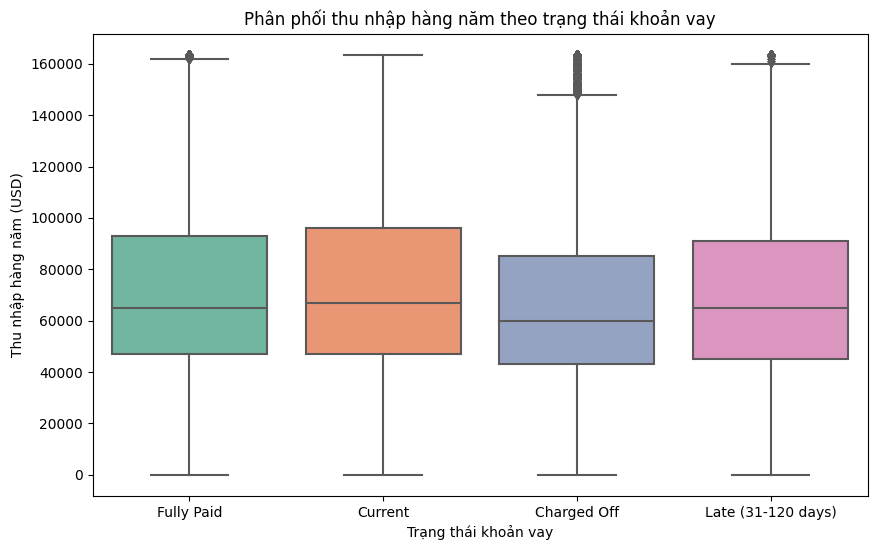

In [40]:
annual_inc_l = data[(data['annual_inc'] <= 250000)]

# Vẽ biểu đồ hộp
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=annual_inc_l, palette='Set2')
plt.title('Phân phối thu nhập hàng năm theo trạng thái khoản vay')
plt.xlabel('Trạng thái khoản vay')
plt.ylabel('Thu nhập hàng năm (USD)')
plt.show()

In [41]:
#xác minh thu nhập
data['verification_status'].value_counts()

verification_status
Source Verified    879786
Not Verified       736915
Verified           624251
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

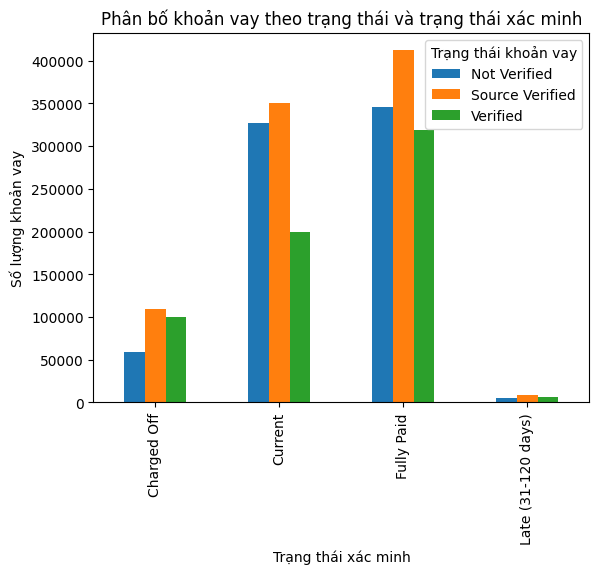

In [42]:
# Vẽ biểu đồ bar
plt.figure(figsize=(12, 6))
data.groupby(['loan_status', 'verification_status']).size().unstack().plot(kind='bar')
plt.title("Phân bố khoản vay theo trạng thái và trạng thái xác minh")
plt.xlabel("Trạng thái xác minh")
plt.ylabel("Số lượng khoản vay")
plt.legend(title='Trạng thái khoản vay')
plt.show()

In [43]:
# Có nhà hay không
data['home_ownership'].value_counts(dropna=False)

home_ownership
MORTGAGE    1102006
RENT         886831
OWN          250939
ANY             988
OTHER           142
NONE             46
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

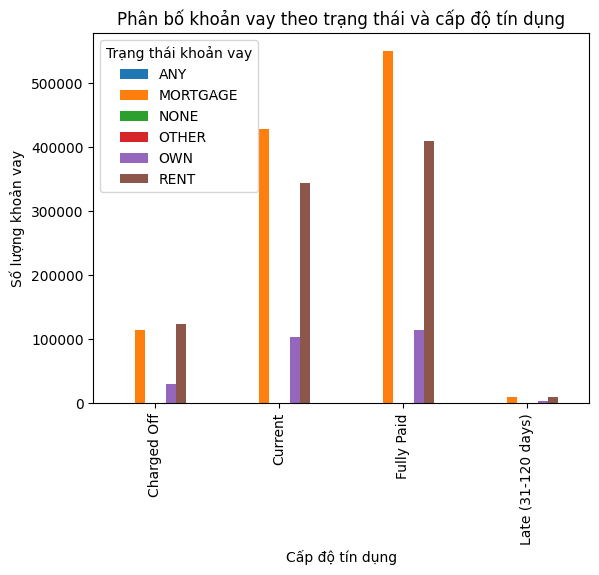

In [44]:
# Vẽ biểu đồ bar
plt.figure(figsize=(12, 6))
data.groupby(['loan_status', 'home_ownership']).size().unstack().plot(kind='bar')
plt.title("Phân bố khoản vay theo trạng thái và cấp độ tín dụng")
plt.xlabel("Cấp độ tín dụng")
plt.ylabel("Số lượng khoản vay")
plt.legend(title='Trạng thái khoản vay')
plt.show()

In [45]:
#Số lượng tài khoản thế chấp
data.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268190.0,1.263489,1.582856,0.0,0.0,1.0,2.0,5.0
Current,876154.0,1.337630,1.554172,0.0,0.0,1.0,2.0,5.0
Fully Paid,1075192.0,1.567209,1.705568,0.0,0.0,1.0,3.0,5.0
Late (31-120 days),21416.0,1.177111,1.497219,0.0,0.0,1.0,2.0,5.0


* Những khách hàng trả được nợ có nhiều khả năng có nhiều tài khoản thế chấp hơn.

# More Pre-processing

In [46]:
data.shape

(2240952, 31)

In [47]:
data.head(5)

,addr_state,annual_inc,application_type,dti,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,zip_code
0,PA,55000.0,Individual,5.91,Aug-2003,10+ years,leadman,679.0,675.0,C,...,0.0,debt_consolidation,2765.0,29.7,C4,36 months,Debt consolidation,13.0,Not Verified,190xx
1,SD,65000.0,Individual,16.06,Dec-1999,10+ years,Engineer,719.0,715.0,C,...,0.0,small_business,21470.0,19.2,C1,36 months,Business,38.0,Not Verified,577xx
2,IL,63000.0,Joint App,10.78,Aug-2000,10+ years,truck driver,699.0,695.0,B,...,0.0,home_improvement,7869.0,56.2,B4,60 months,Unknow,18.0,Not Verified,605xx
3,NJ,110000.0,Individual,17.06,Sep-2008,10+ years,Information Systems Officer,779.0,775.0,C,...,0.0,debt_consolidation,7802.0,11.6,C5,60 months,Debt consolidation,17.0,Source Verified,076xx
4,PA,104433.0,Individual,25.37,Jun-1998,3 years,Contract Specialist,699.0,695.0,F,...,0.0,major_purchase,21929.0,64.5,F1,60 months,Major purchase,35.0,Source Verified,174xx


## Ta tiến hành sử lý các biến OBJECT


* Có thể xóa hoặc mã hóa

In [48]:
object_cols = data.select_dtypes(include=['object'])
print(object_cols.shape)
print(object_cols.info())
object_cols.head()

(2240952, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 2240952 entries, 0 to 2260698
Data columns (total 17 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   addr_state           object
 1   application_type     object
 2   earliest_cr_line     object
 3   emp_length           object
 4   emp_title            object
 5   grade                object
 6   home_ownership       object
 7   id                   object
 8   initial_list_status  object
 9   issue_d              object
 10  loan_status          object
 11  purpose              object
 12  sub_grade            object
 13  term                 object
 14  title                object
 15  verification_status  object
 16  zip_code             object
dtypes: object(17)
memory usage: 307.7+ MB
None


,addr_state,application_type,earliest_cr_line,emp_length,emp_title,grade,home_ownership,id,initial_list_status,issue_d,loan_status,purpose,sub_grade,term,title,verification_status,zip_code
0,PA,Individual,Aug-2003,10+ years,leadman,C,MORTGAGE,68407277,w,Dec-2015,Fully Paid,debt_consolidation,C4,36 months,Debt consolidation,Not Verified,190xx
1,SD,Individual,Dec-1999,10+ years,Engineer,C,MORTGAGE,68355089,w,Dec-2015,Fully Paid,small_business,C1,36 months,Business,Not Verified,577xx
2,IL,Joint App,Aug-2000,10+ years,truck driver,B,MORTGAGE,68341763,w,Dec-2015,Fully Paid,home_improvement,B4,60 months,Unknow,Not Verified,605xx
3,NJ,Individual,Sep-2008,10+ years,Information Systems Officer,C,MORTGAGE,66310712,w,Dec-2015,Current,debt_consolidation,C5,60 months,Debt consolidation,Source Verified,076xx
4,PA,Individual,Jun-1998,3 years,Contract Specialist,F,MORTGAGE,68476807,w,Dec-2015,Fully Paid,major_purchase,F1,60 months,Major purchase,Source Verified,174xx


* Biến zip_code(mã bưu chính) khó xác định nên xóa
* Biến verification_status(Trạng thái xác minh thu nhập của người vay) có thể tách ra thành 3 cột
* Biến title(Mô tả khoản vay) không khác gì purpose --> xóa
* biến term(Kì hạn) có thể chuyển về kiểu số
* biến sub_grade(Xếp hạng tín dụng chi tiết (từ A1 đến G5)) dùng cha thì thôi dùng con =))
* Biến purpose(Mục đích sử dụng khoản vay) tách thành nhiều cột
* Biến loan_status(quan trọng nhất) chuyển thành số mã hóa(0,1,2,3)
* Biến issue_d(Ngày phê duyệt khoản vay) tách ra 3 cột d/m/y
* Biến initial_list_status(Trạng thái khi đề nghị vay lần đầu) Tách thành nhiều cột
* Biến id(Mã định danh của khoản vay) chuyển thành kiểu số
* Biến home_ownership(Có nhà hay không) tách thành nhiều cột
* Biến grade tách nhiều cột
* Biến emp_title(Tên ngành nghề khách hàng) quá nhiều ngành nghề khác nhau -->xóa
* Biến emp_length(Năm kinh nghiệm nghề) đổi thành kiểu số
* Biến earliest_cr_line(Năm mở tín dụng) giữ lại năm
* Biến application_type(Loại ứng dụng vay) Tách thành nhiều cột
* Biến addr_state(Bang của địa chỉ người vay) tách ra nhiều cột

In [49]:
data.columns

Index(['addr_state', 'annual_inc', 'application_type', 'dti',
       'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high',
       'fico_range_low', 'grade', 'home_ownership', 'id',
       'initial_list_status', 'installment', 'int_rate', 'issue_d',
       'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'zip_code'],
      dtype='object')

### Drop

In [50]:
drop_list = ['zip_code','title','sub_grade','emp_title']
data.drop(labels=drop_list, axis=1, inplace=True)

In [51]:
data.shape

(2240952, 27)

### Change types

In [52]:
# Chuyển biến term sang kiểu số
data['term'] = data['term'].str.extract('(\d+)', expand=False).astype(int)

In [53]:
# Chuyển biến loan_status thành 0, 1, 2, 3
mapping = {'Fully Paid': 0, 'Current': 1, 'Charged Off': 2, 'Late (31-120 days)': 3}
data['loan_status'] = data['loan_status'].map(mapping)
data['loan_status'] 

0          0
1          0
2          0
3          1
4          0
          ..
2260694    1
2260695    1
2260696    1
2260697    2
2260698    1
Name: loan_status, Length: 2240952, dtype: int64

In [54]:
# Tách cột issue_d thành 3 cột Day_i, Month_i, Year_i
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['Day_i'] = data['issue_d'].dt.day
data['Month_i'] = data['issue_d'].dt.month
data['Year_i'] = data['issue_d'].dt.year
data.drop(columns=['issue_d'], inplace=True)
data.columns

/tmp/ipykernel_33/3661116953.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])


Index(['addr_state', 'annual_inc', 'application_type', 'dti',
       'earliest_cr_line', 'emp_length', 'fico_range_high', 'fico_range_low',
       'grade', 'home_ownership', 'id', 'initial_list_status', 'installment',
       'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'term', 'total_acc', 'verification_status', 'Day_i', 'Month_i',
       'Year_i'],
      dtype='object')

In [55]:
# Chuyển biến id sang kiểu int
data['id'] = data['id'].astype(int)

In [56]:
# Giữ lại năm và chuyển thành int (earliest_cr_line)
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [57]:
# Chuyển biến emp_length sang kiểu số từ 0 đến 10
mapping = { '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, 
           '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, 
           '10+ years': 10, '0 year': 0}
data['emp_length'] = data['emp_length'].map(mapping)

### One-Hot Coding

In [58]:
One_hot_list = ['verification_status','purpose','initial_list_status','home_ownership','grade','application_type','addr_state']
data = pd.get_dummies(data, columns= One_hot_list, drop_first=True)

In [59]:
# Chuyển đổi các cột mới sang kiểu dữ liệu int
bool_cols = data.columns[data.dtypes == 'bool']
data[bool_cols] = data[bool_cols].fillna(0).astype(int)

In [60]:
print(data.info())
print(data.shape)
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 2240952 entries, 0 to 2260698
Data columns (total 100 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   annual_inc                           float64
 1   dti                                  float64
 2   earliest_cr_line                     int64  
 3   emp_length                           int64  
 4   fico_range_high                      float64
 5   fico_range_low                       float64
 6   id                                   int64  
 7   installment                          float64
 8   int_rate                             float64
 9   loan_amnt                            float64
 10  loan_status                          int64  
 11  mort_acc                             float64
 12  open_acc                             float64
 13  pub_rec                              float64
 14  pub_rec_bankruptcies                 float64
 15  revol_bal                           

,annual_inc,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,id,installment,int_rate,loan_amnt,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,55000.0,5.91,2003,10,679.0,675.0,68407277,123.03,13.99,3600.0,...,0,0,0,0,0,0,0,0,0,0
1,65000.0,16.06,1999,10,719.0,715.0,68355089,820.28,11.99,24700.0,...,1,0,0,0,0,0,0,0,0,0
2,63000.0,10.78,2000,10,699.0,695.0,68341763,432.66,10.78,20000.0,...,0,0,0,0,0,0,0,0,0,0
3,110000.0,17.06,2008,10,779.0,775.0,66310712,829.90,14.85,35000.0,...,0,0,0,0,0,0,0,0,0,0
4,104433.0,25.37,1998,3,699.0,695.0,68476807,289.91,22.45,10400.0,...,0,0,0,0,0,0,0,0,0,0


### Kiểm tra NaN


In [61]:
# Tính tổng số giá trị NULL cho mỗi cột
null_percentages = data.isnull().sum()

# Lọc ra các cột có giá trị NULL lớn hơn 0
null_columns = null_percentages[null_percentages > 0]

# Hiển thị kết quả
print(null_columns)

Series([], dtype: int64)


### Chia dữ liệu thành trả được nợ hay không và trả nợ trễ hay không

In [62]:
# Chia DataFrame data thành 2 tập dữ liệu con
data_FC = data[data['loan_status'].isin([0, 2])]
data_CL = data[data['loan_status'].isin([1, 3])]

In [63]:
data_FC['loan_status_binary'] = (data_FC['loan_status'] != 0).astype(int)
# 0: Fully Paid         1: Charged Off
data_CL['loan_status_binary'] = (data_CL['loan_status'] != 1).astype(int)
# 0: Current            1: Late (31-120 days)
data_FC.drop('loan_status', axis=1, inplace=True)
data_CL.drop('loan_status', axis=1, inplace=True)

/tmp/ipykernel_33/2490410415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FC['loan_status_binary'] = (data_FC['loan_status'] != 0).astype(int)
/tmp/ipykernel_33/2490410415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_CL['loan_status_binary'] = (data_CL['loan_status'] != 1).astype(int)
/tmp/ipykernel_33/2490410415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

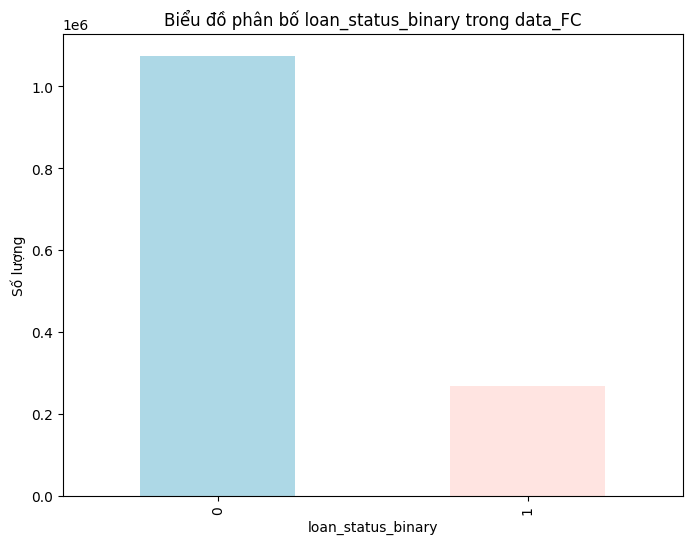

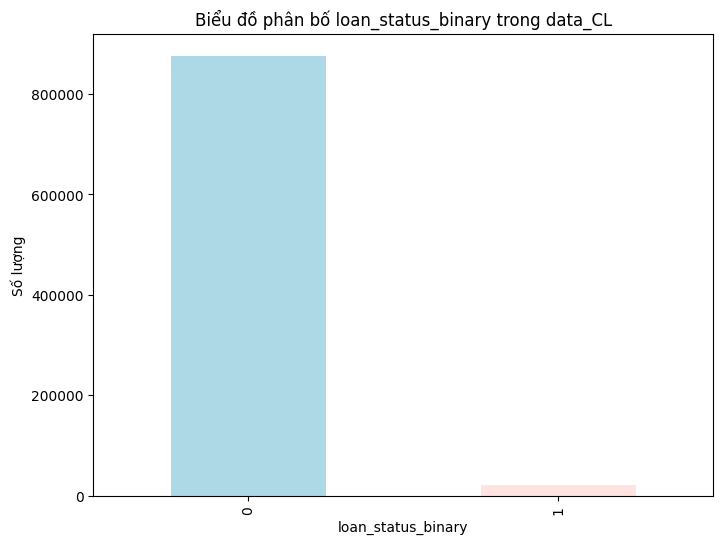

In [64]:
# Biểu đồ cho data_FC
plt.figure(figsize=(8, 6))
data_FC['loan_status_binary'].value_counts().plot(kind='bar', color=['lightblue', 'mistyrose'])
plt.title('Biểu đồ phân bố loan_status_binary trong data_FC')
plt.xlabel('loan_status_binary')
plt.ylabel('Số lượng')
plt.show()

# Biểu đồ cho data_CL 
plt.figure(figsize=(8, 6))
data_CL['loan_status_binary'].value_counts().plot(kind='bar' , color=['lightblue', 'mistyrose'])
plt.title('Biểu đồ phân bố loan_status_binary trong data_CL')
plt.xlabel('loan_status_binary')
plt.ylabel('Số lượng')
plt.show()

* Dữ liệu mất cân đối nhưng thẫm đẫm lời cô dạy em không sửa nữa

# Train Model

## Data_FC

### Random Forest

* Em chọn vì đỡ overfitting như Decision Tree

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
#Chọn biến mục tiêu
y = data_FC['loan_status_binary']
X = data_FC.drop('loan_status_binary',axis =1)

In [66]:
# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo các bước trong pipeline

steps = [
    ('imputer', SimpleImputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('model', RandomForestClassifier(n_estimators=500, random_state=42))
] 

# Tạo pipeline 
pipeline = Pipeline(steps)

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = pipeline.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.805


### Logistic Regression

* Huấn luyện thêm mô hình hồi quy vì có sự tương quan mạnh giữa các biến độc lập

In [67]:
from sklearn.linear_model import LogisticRegression
# Tạo các bước trong pipeline
steps1 = [
    ('imputer', SimpleImputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('model', LogisticRegression(max_iter=500, tol=1e-3, random_state=1, warm_start=True))
]

# Tạo pipeline
pipeline1 = Pipeline(steps1)

# Huấn luyện mô hình
pipeline1.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred1 = pipeline1.predict(X_test)

# Đánh giá độ chính xác
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1:.3f}")

Accuracy: 0.803


* Lựa chọn mô hình

In [68]:
print('Độ chính xác')
print('Random forest:       ', accuracy )
print('Logistic regression: ',accuracy1)

Độ chính xác
Random forest:        0.8049181731223737
Logistic regression:  0.8034405624597565


* 2 mô hình có chỉ số dự đoán đúng tương đương là khoảng 80% 
* Tuy nhiên mô hình Logistic regression dễ hiểu và dễ diễn giải hơn đồng thời phù hợp với các biến nhị phân của dữ liệu
* --> chọn mô hình Logistic regression

### Trực quan hoá Confusion Matrix

Text(0.5, 427.9555555555555, 'Predicted label')

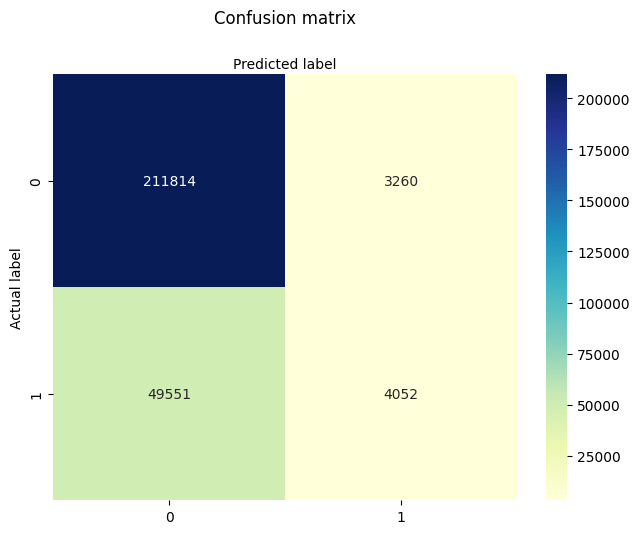

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# vẽ heatmap
cnf_matrix=confusion_matrix(y_test, y_pred1)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

* 211814 Khách hàng trả được nợ và được mô hình dự đoán là trả được nợ
* 49551 Khách hàng không trả được nợ nhưng mô hình dự đoán là trả được nợ
* 4052 khách hành không trả được nợ và mô hình dự đoán là không trả được nợ
* 3260 Khách hàng trả được nợ nhưng mô hình dự đoán là không trả được nợ

### In kết quả classification report

In [70]:
from sklearn.metrics import classification_report
target_names = ['Fully Paid', 'Charged Off']
print(classification_report(y_test, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

  Fully Paid       0.81      0.98      0.89    215074
 Charged Off       0.55      0.08      0.13     53603

    accuracy                           0.80    268677
   macro avg       0.68      0.53      0.51    268677
weighted avg       0.76      0.80      0.74    268677



* Mô hình có hiệu suất tốt trong việc nhận diện các khoản vay "Fully Paid" nhưng gặp khó khăn trong việc nhận diện các khoản vay "Charged Off".
* Precision cao và Recall thấp cho lớp "Charged Off": Mô hình có nhiều dự đoán "Charged Off" chính xác khi nó dự đoán "Charged Off", nhưng bỏ lỡ rất nhiều khoản vay thực sự "Charged Off".

### ROC Curve

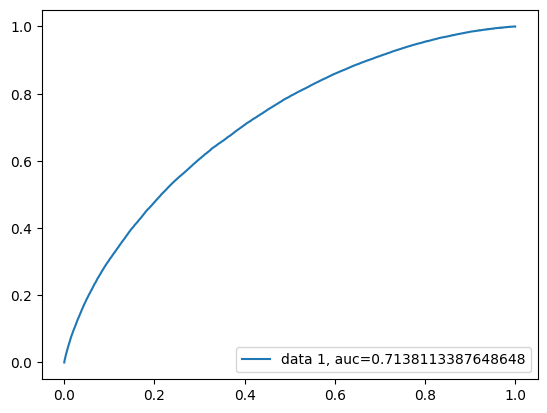

In [71]:
from sklearn import metrics

y_pred_proba = pipeline1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Data_CL

### Dùng Oversampling do lệch khủng khiếp

In [72]:
data_cl0 = data_CL[data_CL['loan_status_binary'] == 0]
data_cl1 = data_CL[data_CL['loan_status_binary'] == 1]
data_cl_0 = data_cl0.sample(len(data_cl1)*2)
data_cl_new = pd.concat([data_cl_0,data_cl1])

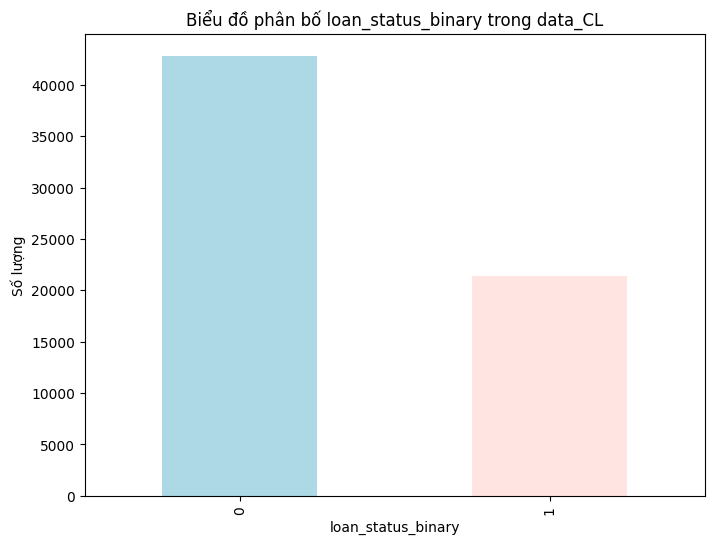

In [73]:
plt.figure(figsize=(8, 6))
data_cl_new['loan_status_binary'].value_counts().plot(kind='bar' , color=['lightblue', 'mistyrose'])
plt.title('Biểu đồ phân bố loan_status_binary trong data_CL')
plt.xlabel('loan_status_binary')
plt.ylabel('Số lượng')
plt.show()

In [74]:
#Chọn biến mục tiêu
w = data_cl_new['loan_status_binary']
Z = data_cl_new.drop('loan_status_binary',axis =1)

In [75]:
from sklearn.linear_model import LogisticRegression
# Chia dữ liệu thành tập train và tập test
Z_train, Z_test, w_train, w_test = train_test_split(Z, w, test_size=0.2, random_state=42)

# Tạo các bước trong pipeline
steps2 = [
    ('imputer', SimpleImputer(copy=False)),  
    ('scaler', StandardScaler(copy=False)),
    ('model', LogisticRegression(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
]
 
# Tạo pipeline
pipeline2 = Pipeline(steps2)

# Huấn luyện mô hình
pipeline2.fit(Z_train, w_train)

# Dự đoán trên tập test
w_pred = pipeline2.predict(Z_test)

# Đánh giá độ chính xácn
accuracy2 = accuracy_score(w_test, w_pred)
print('accuracy: ', accuracy2)

accuracy:  0.6946303501945525


* Độ tin cậy mô hình là 70%

### Ma Trận

Text(0.5, 427.9555555555555, 'Predicted label')

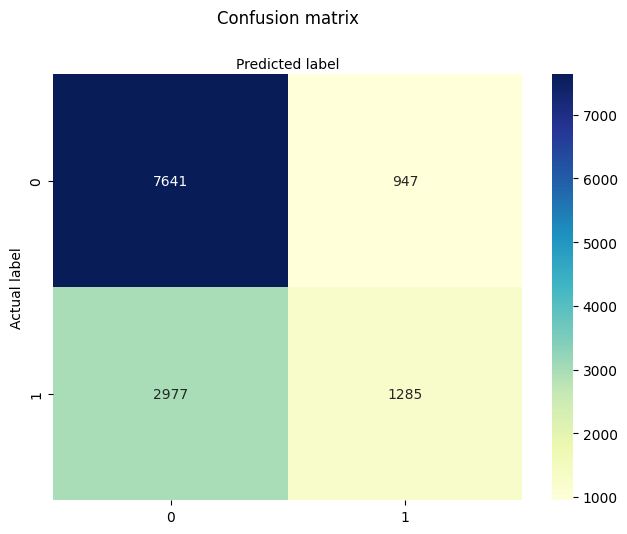

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# vẽ heatmap
cnf_matrix=confusion_matrix(w_test, w_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
from sklearn.metrics import classification_report
target_names = ['Current', 'Late (31-120 days)']
print(classification_report(w_test, w_pred, target_names=target_names))

                    precision    recall  f1-score   support

           Current       0.72      0.89      0.80      8588
Late (31-120 days)       0.58      0.30      0.40      4262

          accuracy                           0.69     12850
         macro avg       0.65      0.60      0.60     12850
      weighted avg       0.67      0.69      0.66     12850

